# Dimensionality Reduction on the Fashion-MNIST Dataset

Fashion-MNIST is a dataset for clothes. Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. The data set is linked [here.](https://www.openml.org/d/40996) 

Both SVD and PCA are used to generate the images of clothing item. The number of principal components required to get a clear image are determined. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [ ]:
x.shape

(1000, 784)

Label is: Ankle boot


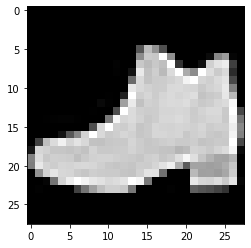

In [ ]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

## 1. Reducing the Dataset
Reducing the dataset to include only three categories of similar lookung clothing items. This is to enable the principal components to fit the data better. Here, it is the sandal, sneaker and ankle boot.

In [ ]:
# getting the reduced dataset
df_y = pd.DataFrame(y)
new_data = df_y['class'].astype(int).isin([5, 7, 9])
new_data = pd.DataFrame(new_data)
new_data_index = new_data.index[new_data['class']].tolist()
final_data = x.loc[new_data_index]
# final_data
# final_data.shape

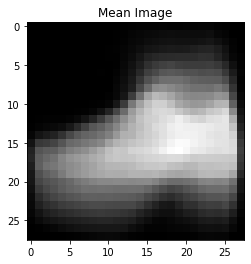

In [ ]:
# checking if chosen items are of the same type 
final_mat = np.array(final_data)
mean_image = np.reshape(final_mat.mean(axis = 0), final_data.shape[1])
plt.imshow(mean_image.reshape(28,28), cmap=plt.cm.gray)
plt.title('Mean Image')
plt.show()

In [ ]:
# finding eigenvalues and eigenvectors using SVD
U, S, V = np.linalg.svd(final_mat)
eigen_values = S**2   # eigenvalues are square of sigma values
eigen_vectors = V.T   # eigenvectors are the transpose of V

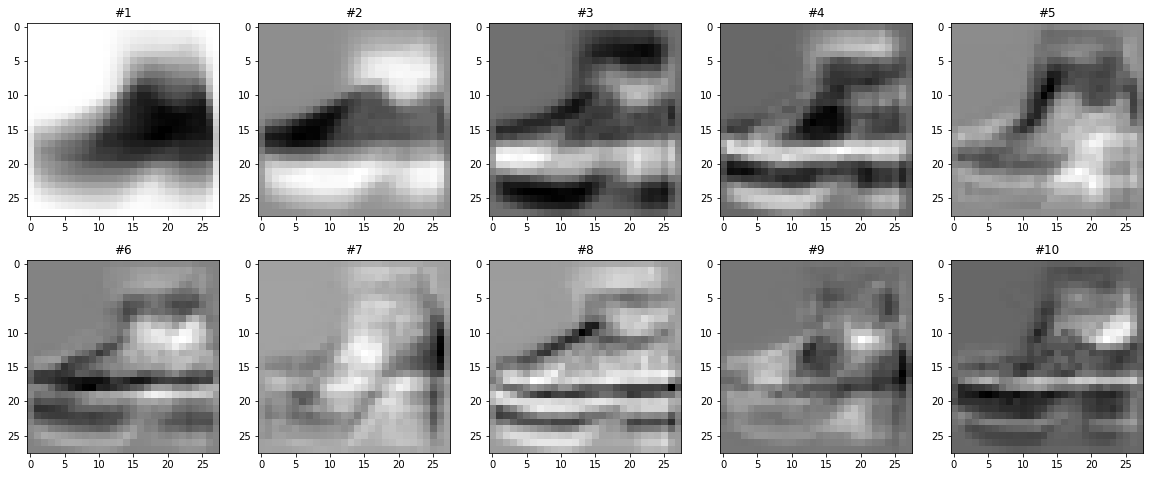

In [ ]:
# first 10 eigen images
import math
count = 10
rows = math.ceil(count/5)
fig = plt.figure(figsize = (20, 8))
for i in range(count):
  plt.subplot(rows, 5, i+1)
  plt.imshow(eigen_vectors[:, i].reshape(-1, 28), cmap = plt.cm.gray)
  plt.title('#{}'.format(i+1))

## 2. Reconstructing the Dataset

### 2a. Reconstructing the Full Dataset Using SVD

In [ ]:
# reconstructing using svd (full dataset)

def reconstruct_svd_full(image_index, n):

  #plotting original image
  plt.imshow(x.iloc[image_index].values.reshape(28,28), cmap = plt.cm.gray)
  plt.title('Original Image')
  plt.show()

  # svd
  U, S, V = np.linalg.svd(x)
  eigen_values = S**2  
  eigen_vectors = V.T 

  recon_n = (U[:, 0:n]* S[0:n]) @ V[0:n, :]

  # plotting reconstructed images using differnt number of PCs upto n
  step = int(n/20)
  for i in range(1, n, step):
    recon = (U[:, 0:i]* S[0:i]) @ V[0:i, :]
    plt.imshow(recon[image_index].reshape(28,28))
    plt.title('Reconstructed Image with {} PCs'.format(i))
    plt.show()
  
  #plotting the reconstructed image with exactly n PCs
  plt.imshow(recon_n[image_index].reshape(28,28))
  plt.title('Reconstructed Image with {} PCs'.format(n))
  plt.show()

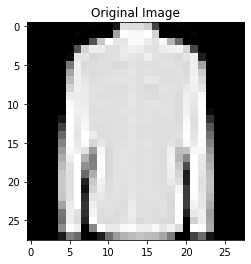

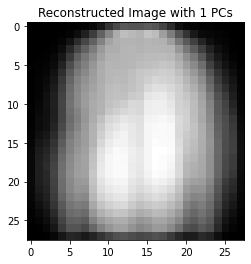

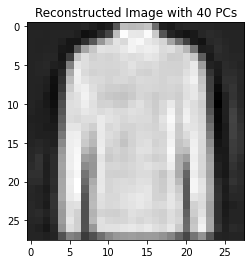

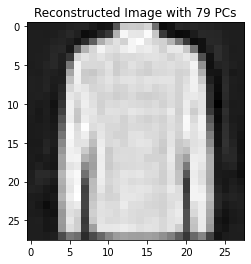

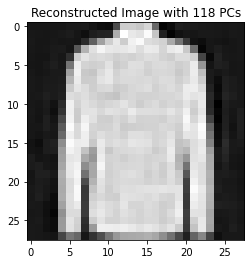

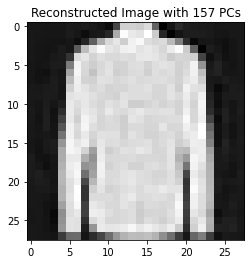

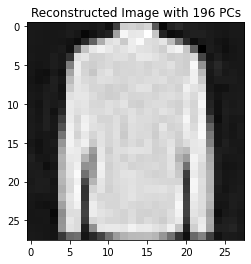

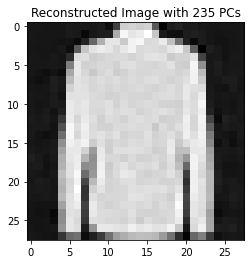

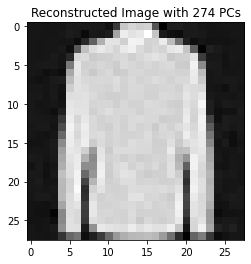

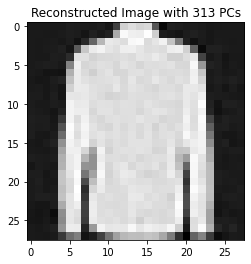

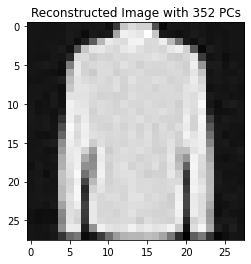

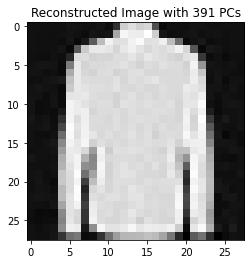

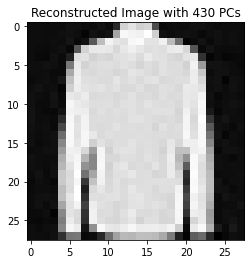

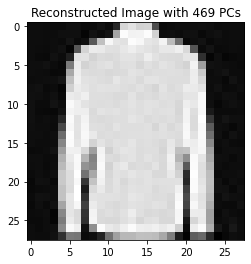

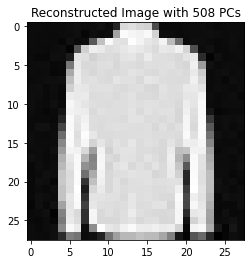

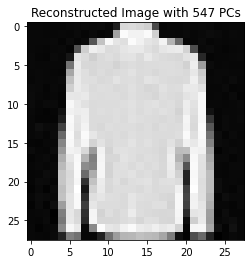

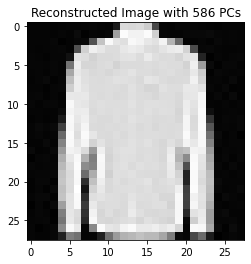

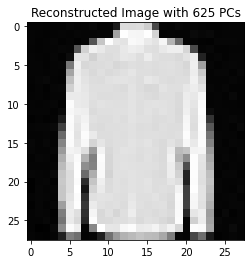

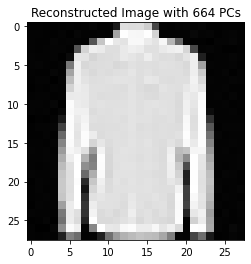

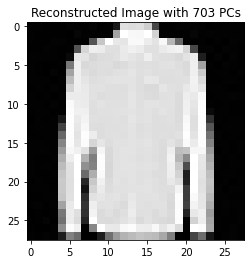

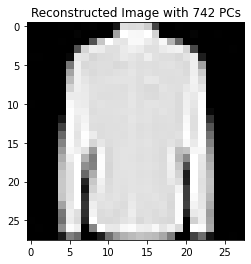

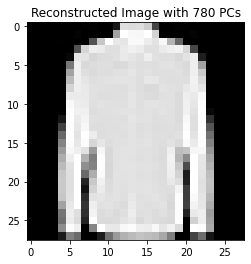

In [ ]:
import random
ind_svd = random.randint(0,1000)
pc_num_svd = 780
reconstruct_svd_full(ind_svd, pc_num_svd)

### 2b. Reconstructing the Reduced Dataset Using SVD 

In [ ]:
# reconstructing using svd (reduced dataset with only items from 3 different categories)

def reconstruct_svd_reduced(image_index, n):

  #plotting original image
  plt.imshow(final_data.iloc[image_index].values.reshape(28,28), cmap = plt.cm.gray)
  plt.title('Original Image')
  plt.show()

  # svd
  U, S, V = np.linalg.svd(final_data)
  eigen_values = S**2  
  eigen_vectors = V.T 

  recon_n = (U[:, 0:n]* S[0:n]) @ V[0:n, :]

  # plotting reconstructed images using differnt number of PCs upto n
  step = int(n/20)
  for i in range(1, n, step):
    recon = (U[:, 0:i]* S[0:i]) @ V[0:i, :]
    plt.imshow(recon[image_index].reshape(28,28))
    plt.title('Reconstructed Image with {} PCs'.format(i))
    plt.show()
  
  #plotting the reconstructed image with exactly n PCs
  plt.imshow(recon_n[image_index].reshape(28,28))
  plt.title('Reconstructed Image with {} PCs'.format(n))
  plt.show()

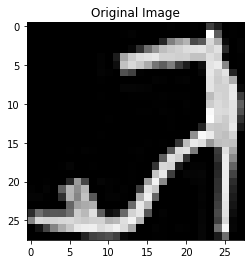

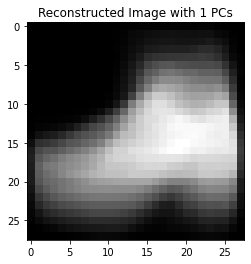

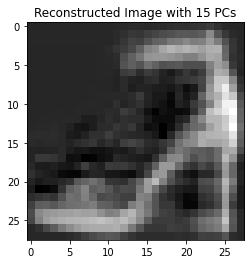

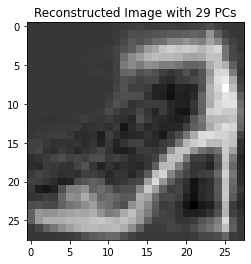

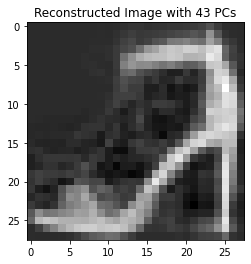

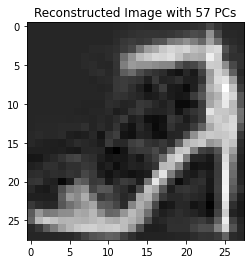

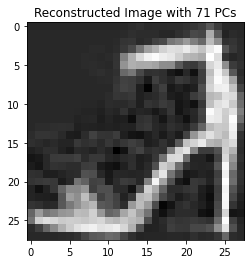

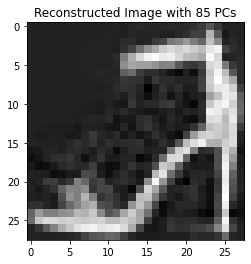

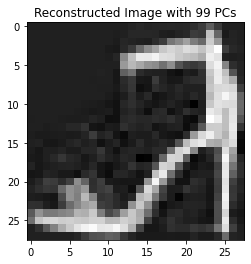

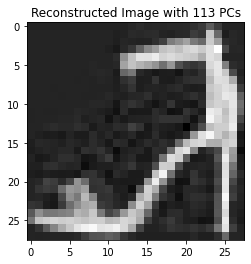

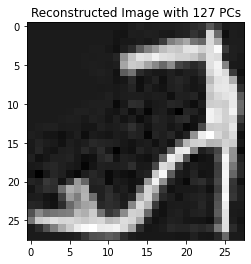

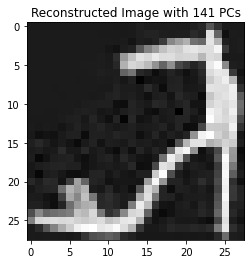

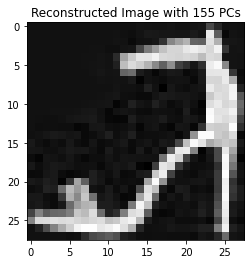

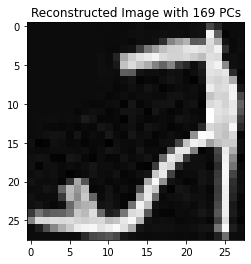

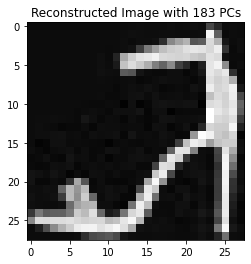

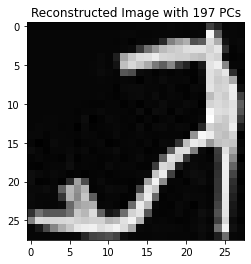

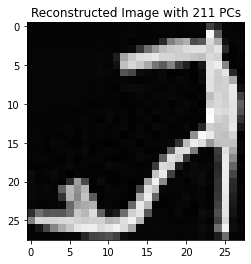

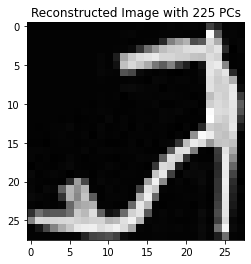

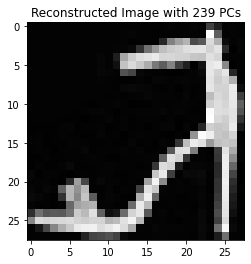

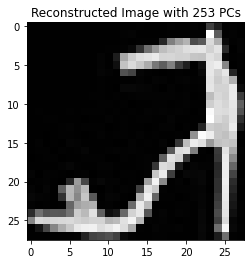

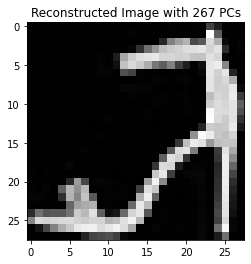

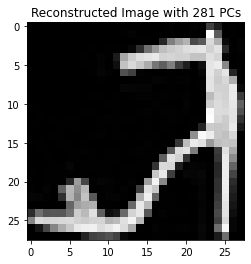

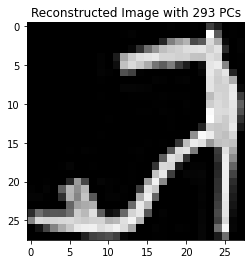

In [ ]:
ind_svd = random.randint(0,293)
pc_num_svd = 293
reconstruct_svd_reduced(ind_svd, pc_num_svd)

### 2c. Reconstructing the Full Dataset Using PCA

In [ ]:
# reconstruction using eigen vectors (full dataset)

def reconstruct_ev_full(image_index, n):
  # image_index = random.randint(1,1000)

  #original image
  plt.imshow(x.iloc[image_index].values.reshape(28,28), cmap = plt.cm.gray)
  plt.title('Original Image')
  plt.show()

  scaler = StandardScaler()
  x_std = scaler.fit_transform(x)

  # multiple reconstructions with different number of PCs upto n
  step = int(n/20)    # step for getting 20 reconstructions upto n
  for i in range(1, n, step):
    W = eigen_vectors[:, 0:i]
    proj = np.dot(x_std, W)
    recon = np.dot(proj, W.T)
    recon_orig = scaler.inverse_transform(recon)

    plt.imshow(recon_orig[image_index].reshape(28,28))
    plt.title('Reconstructed Image with {} PCs'.format(i))
    plt.show()

  # reconstruction with exactly n PCs
  plt.imshow(recon_orig[image_index].reshape(28,28))
  plt.title('Reconstructed Image with {} PCs'.format(n))
  plt.show()

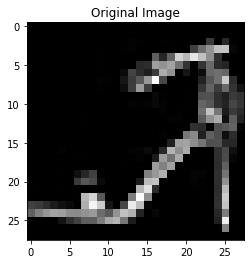

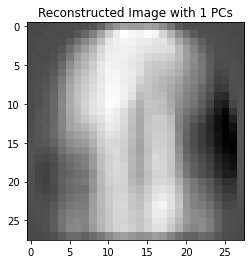

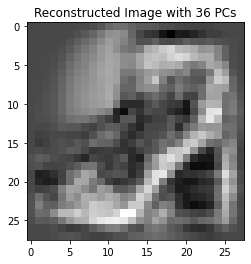

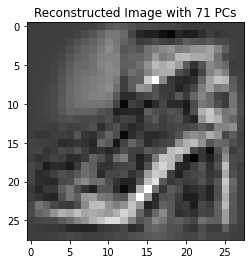

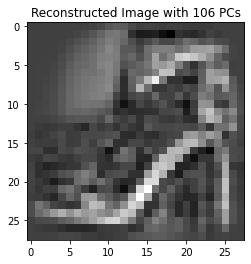

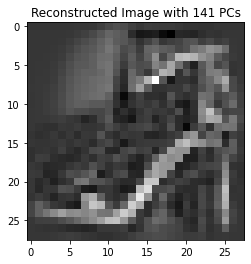

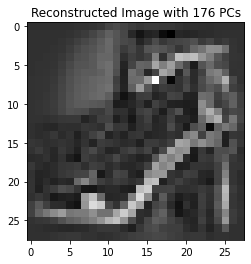

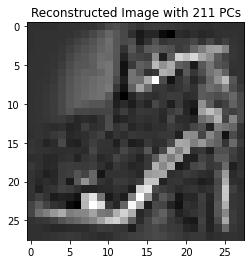

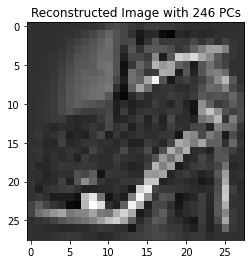

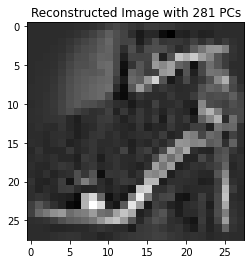

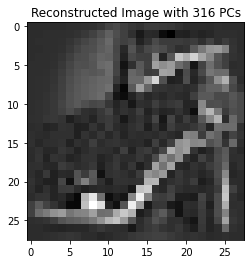

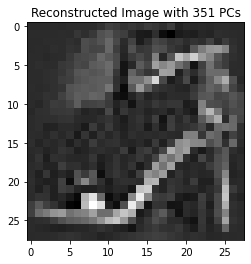

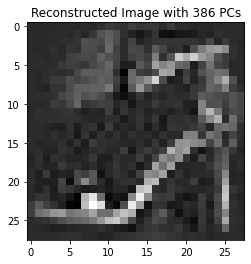

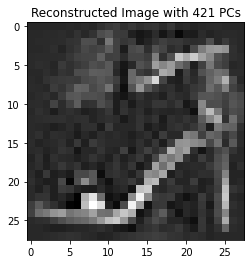

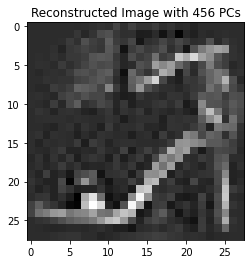

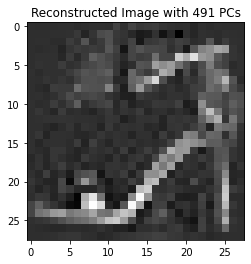

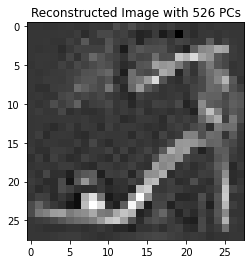

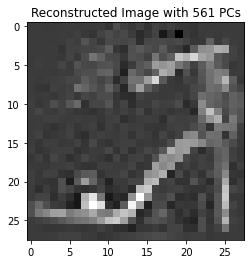

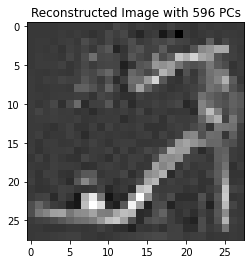

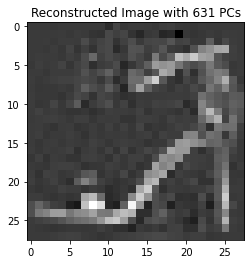

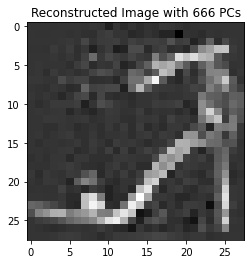

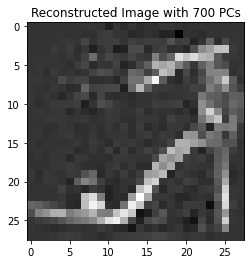

In [ ]:
ind_ev = random.randint(0,1000)
pc_num_ev = 700
reconstruct_ev_full(ind_ev, pc_num_ev)

### 2d. Reconstructing the Reduced Dataset Using PCA

In [ ]:
# reconstruction using eigen vectors (reduced dataset)

def reconstruct_ev_reduced(image_index, n):
  #original image
  plt.imshow(final_data.iloc[image_index].values.reshape(28,28), cmap = plt.cm.gray)
  plt.title('Original Image')
  plt.show()

  scaler = StandardScaler()
  x_std = scaler.fit_transform(final_data)

  # multiple reconstructions with different number of PCs upto n
  step = int(n/20)    # step for getting 20 reconstructions upto n
  for i in range(1, n, step):
    W = eigen_vectors[:, 0:i]
    proj = np.dot(x_std, W)
    recon = np.dot(proj, W.T)
    recon_orig = scaler.inverse_transform(recon)

    plt.imshow(recon_orig[image_index].reshape(28,28))
    plt.title('Reconstructed Image with {} PCs'.format(i))
    plt.show()

  # reconstruction with exactly n PCs
  plt.imshow(recon_orig[image_index].reshape(28,28))
  plt.title('Reconstructed Image with {} PCs'.format(n))
  plt.show()

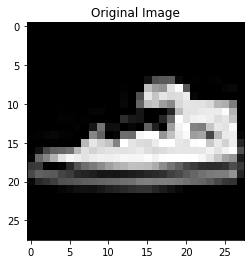

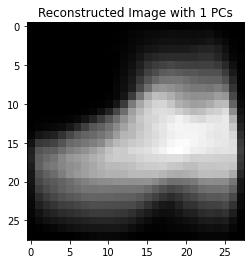

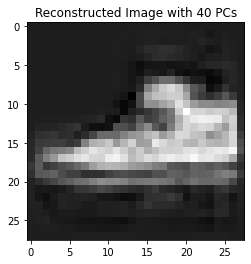

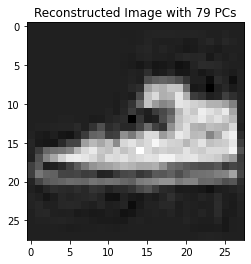

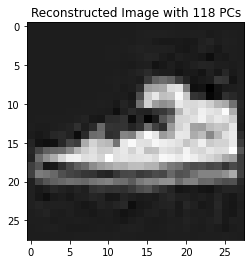

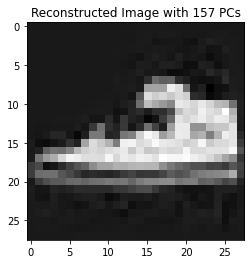

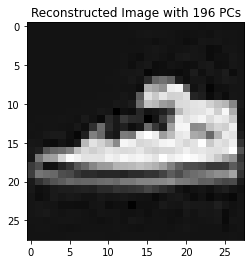

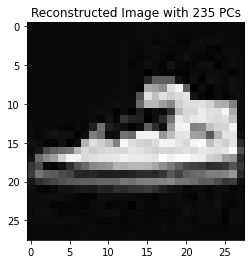

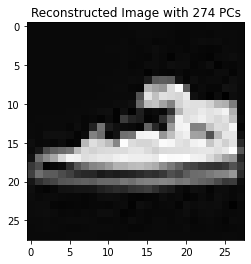

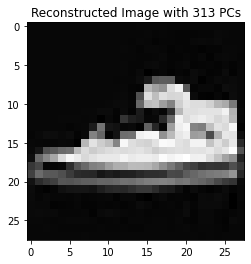

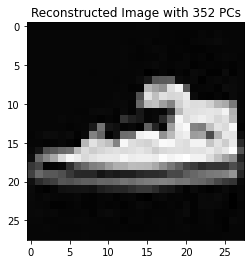

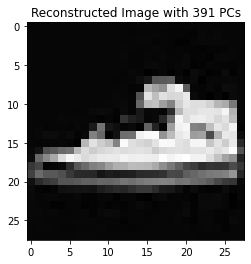

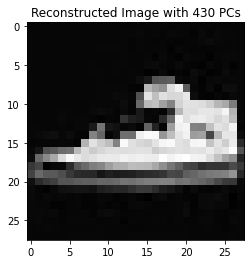

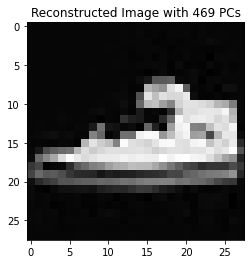

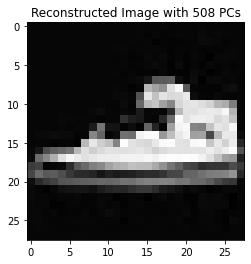

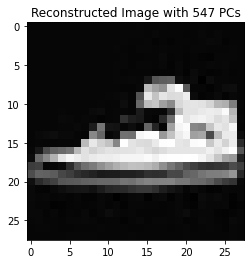

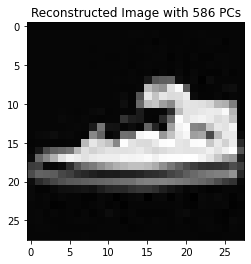

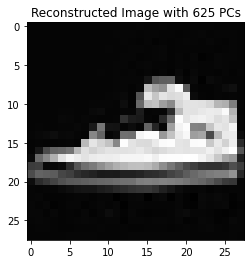

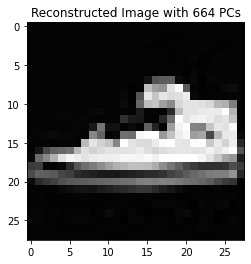

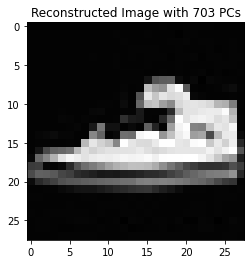

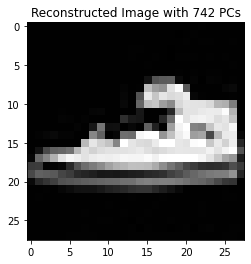

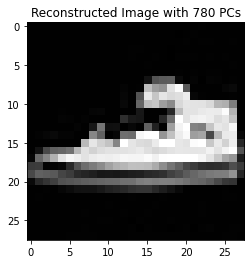

In [ ]:
ind_ev = random.randint(0,284)
pc_num_ev = 780
reconstruct_ev_reduced(ind_ev, pc_num_ev)

**Some Observations**

Different eigenvectors capture slighly different features of the dataset. In our case, the first eigenvector captures darker footwear colours while the second one captures lighter tones. These differences can be used to our advantage to ideally capture the required item. Also, the first few eigen vectors seem to capture clearer images while the later ones have blurry images. To capture the high-level details, the first few eigenvectors can be used.